# Project 3 : Thera Bank Persnal Loan Modelling Project

## 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.metrics import roc_curve

In [2]:
#importing datasets
df=pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [3]:
#Shape of the dataset
df.shape

(5000, 14)

In [4]:
#checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
#Statistical Summary
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [6]:
#Checking Null Values
df.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [7]:
#Checking top & bottom 10 rows to see if there is any incorrect entries.
df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [8]:
df.tail(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


### Comments
* The data set does not any null values. However,
* Experience Min is negative. This is incorrect.
* ZIP code Min is 4 digits. This is incorrect.
* All other data looks good.

## 2. EDA: Study the data distribution in each attribute and target variable, share your findings(20 marks)
* Number of unique in each column?
* Number of people with zero mortgage?
* Number of people with zero credit card spending per month?
* Value counts of all categorical columns.
* Univariate and Bivariate
* Get data model ready

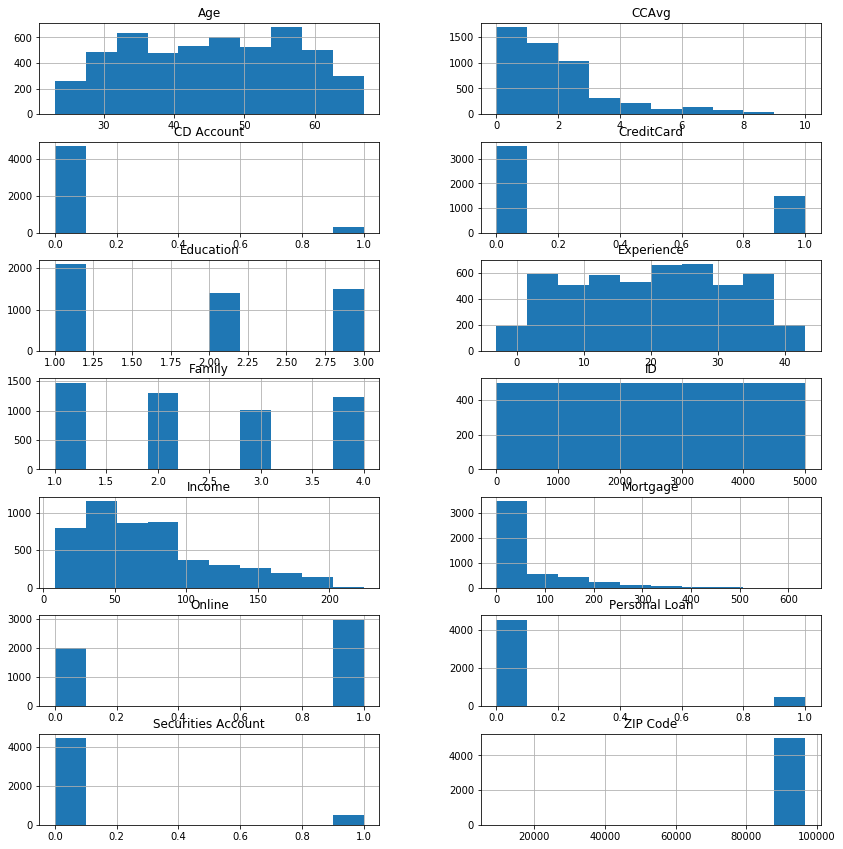

In [9]:
#data distribution in each attribute and target variable
df.hist(figsize=(14,30), layout=(14,2), bins=10);

In [10]:
# Number of unique in each column
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [11]:
# Number of people with zero mortgage?
print("Number of people with zero mortgage : ", len(df[df.Mortgage==0]))

Number of people with zero mortgage :  3462


In [12]:
# Number of people with zero credit card spending per month?
print("Number of people with zero credit card spending per month : ", len(df[df.CCAvg==0]))

Number of people with zero credit card spending per month :  106


In [13]:
#Continuous Columns
concols = ['Age','Experience','Income','CCAvg','Mortgage']
#Categorical Columns
catcols = ['Family', 'Education', 'Personal Loan','Securities Account','CD Account','Online','CreditCard']
for c in catcols:
    df[c] = df[c].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIP Code            5000 non-null   int64   
 5   Family              5000 non-null   category
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal Loan       5000 non-null   category
 10  Securities Account  5000 non-null   category
 11  CD Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(6)
memory usage: 308.5 KB


In [14]:
#Value Counts of the Categorical Columns
for c in catcols:
    print("Column: "+c)
    print("Cat Count")
    print(df[c].value_counts())
    print()

Column: Family
Cat Count
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

Column: Education
Cat Count
1    2096
3    1501
2    1403
Name: Education, dtype: int64

Column: Personal Loan
Cat Count
0    4520
1     480
Name: Personal Loan, dtype: int64

Column: Securities Account
Cat Count
0    4478
1     522
Name: Securities Account, dtype: int64

Column: CD Account
Cat Count
0    4698
1     302
Name: CD Account, dtype: int64

Column: Online
Cat Count
1    2984
0    2016
Name: Online, dtype: int64

Column: CreditCard
Cat Count
0    3530
1    1470
Name: CreditCard, dtype: int64



### Univariate Analysis

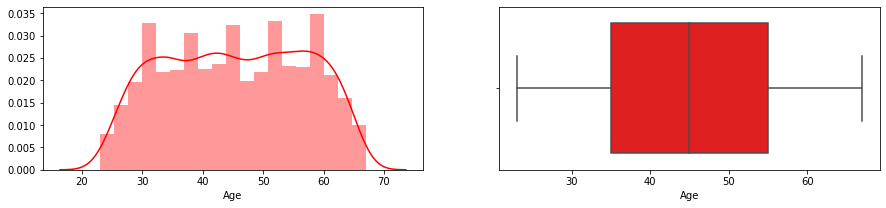

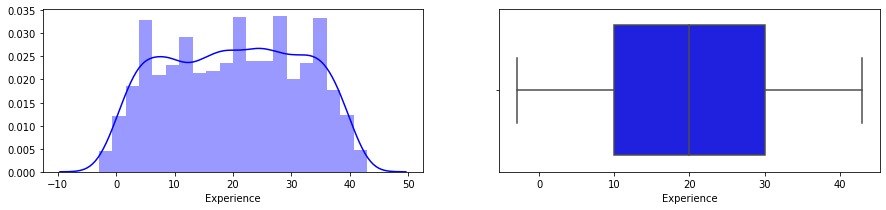

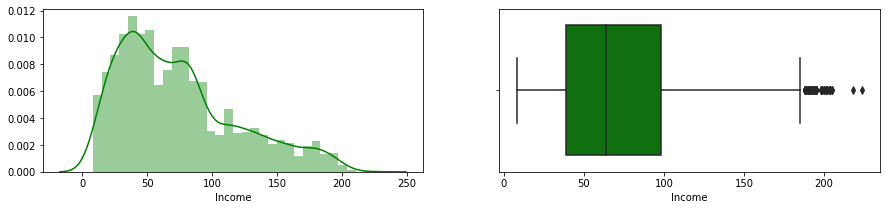

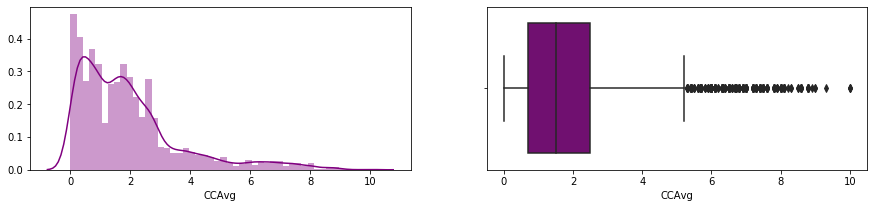

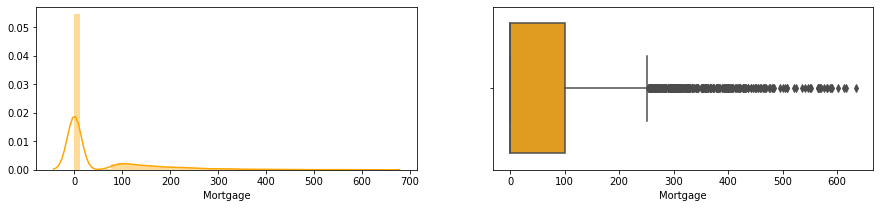

In [15]:
nconcols = len(concols) # count of continuous columns
colors = ['red','blue','green','purple','orange']
def plotua(series, color):
    plt.figure(figsize=(15,3))
    plt.subplot(1,2,1)
    sns.distplot(series, color=color)
    plt.subplot(1,2,2)
    sns.boxplot(series, color=color)
    plt.show()

for i in range(0,nconcols):
    plotua(df[concols[i]],colors[i])

### Comment
* Age and Experience seem to have rounding off artifacts. Many peak values near 10s, 20s, 30s.
* Mortgage have lots of zero values and it is artificially skwed the curve. Removing the zeros and a log of the values might give a better insight. However, the 'zero's are valid values and should not be removed from the final analysis.

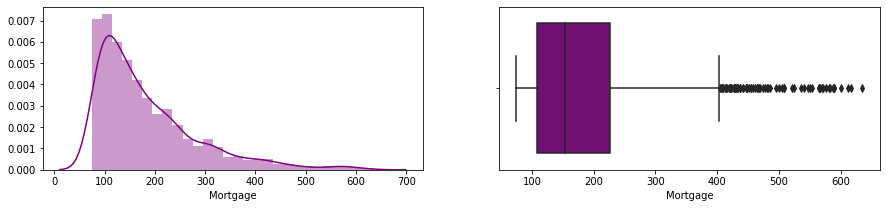

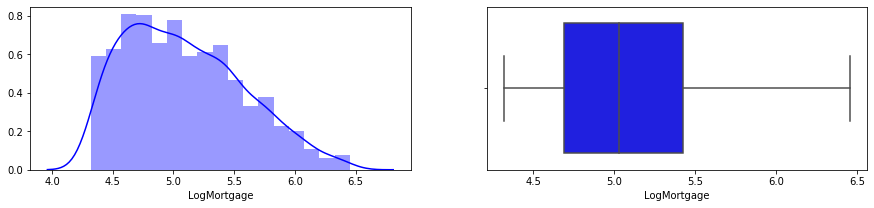

In [16]:
df2 = df[df.Mortgage>0][["Mortgage"]]
df2["LogMortgage"] = np.log(df2["Mortgage"])
plotua(df2.Mortgage,'purple')
plotua(df2.LogMortgage,'blue')

### Bivariate Analysis

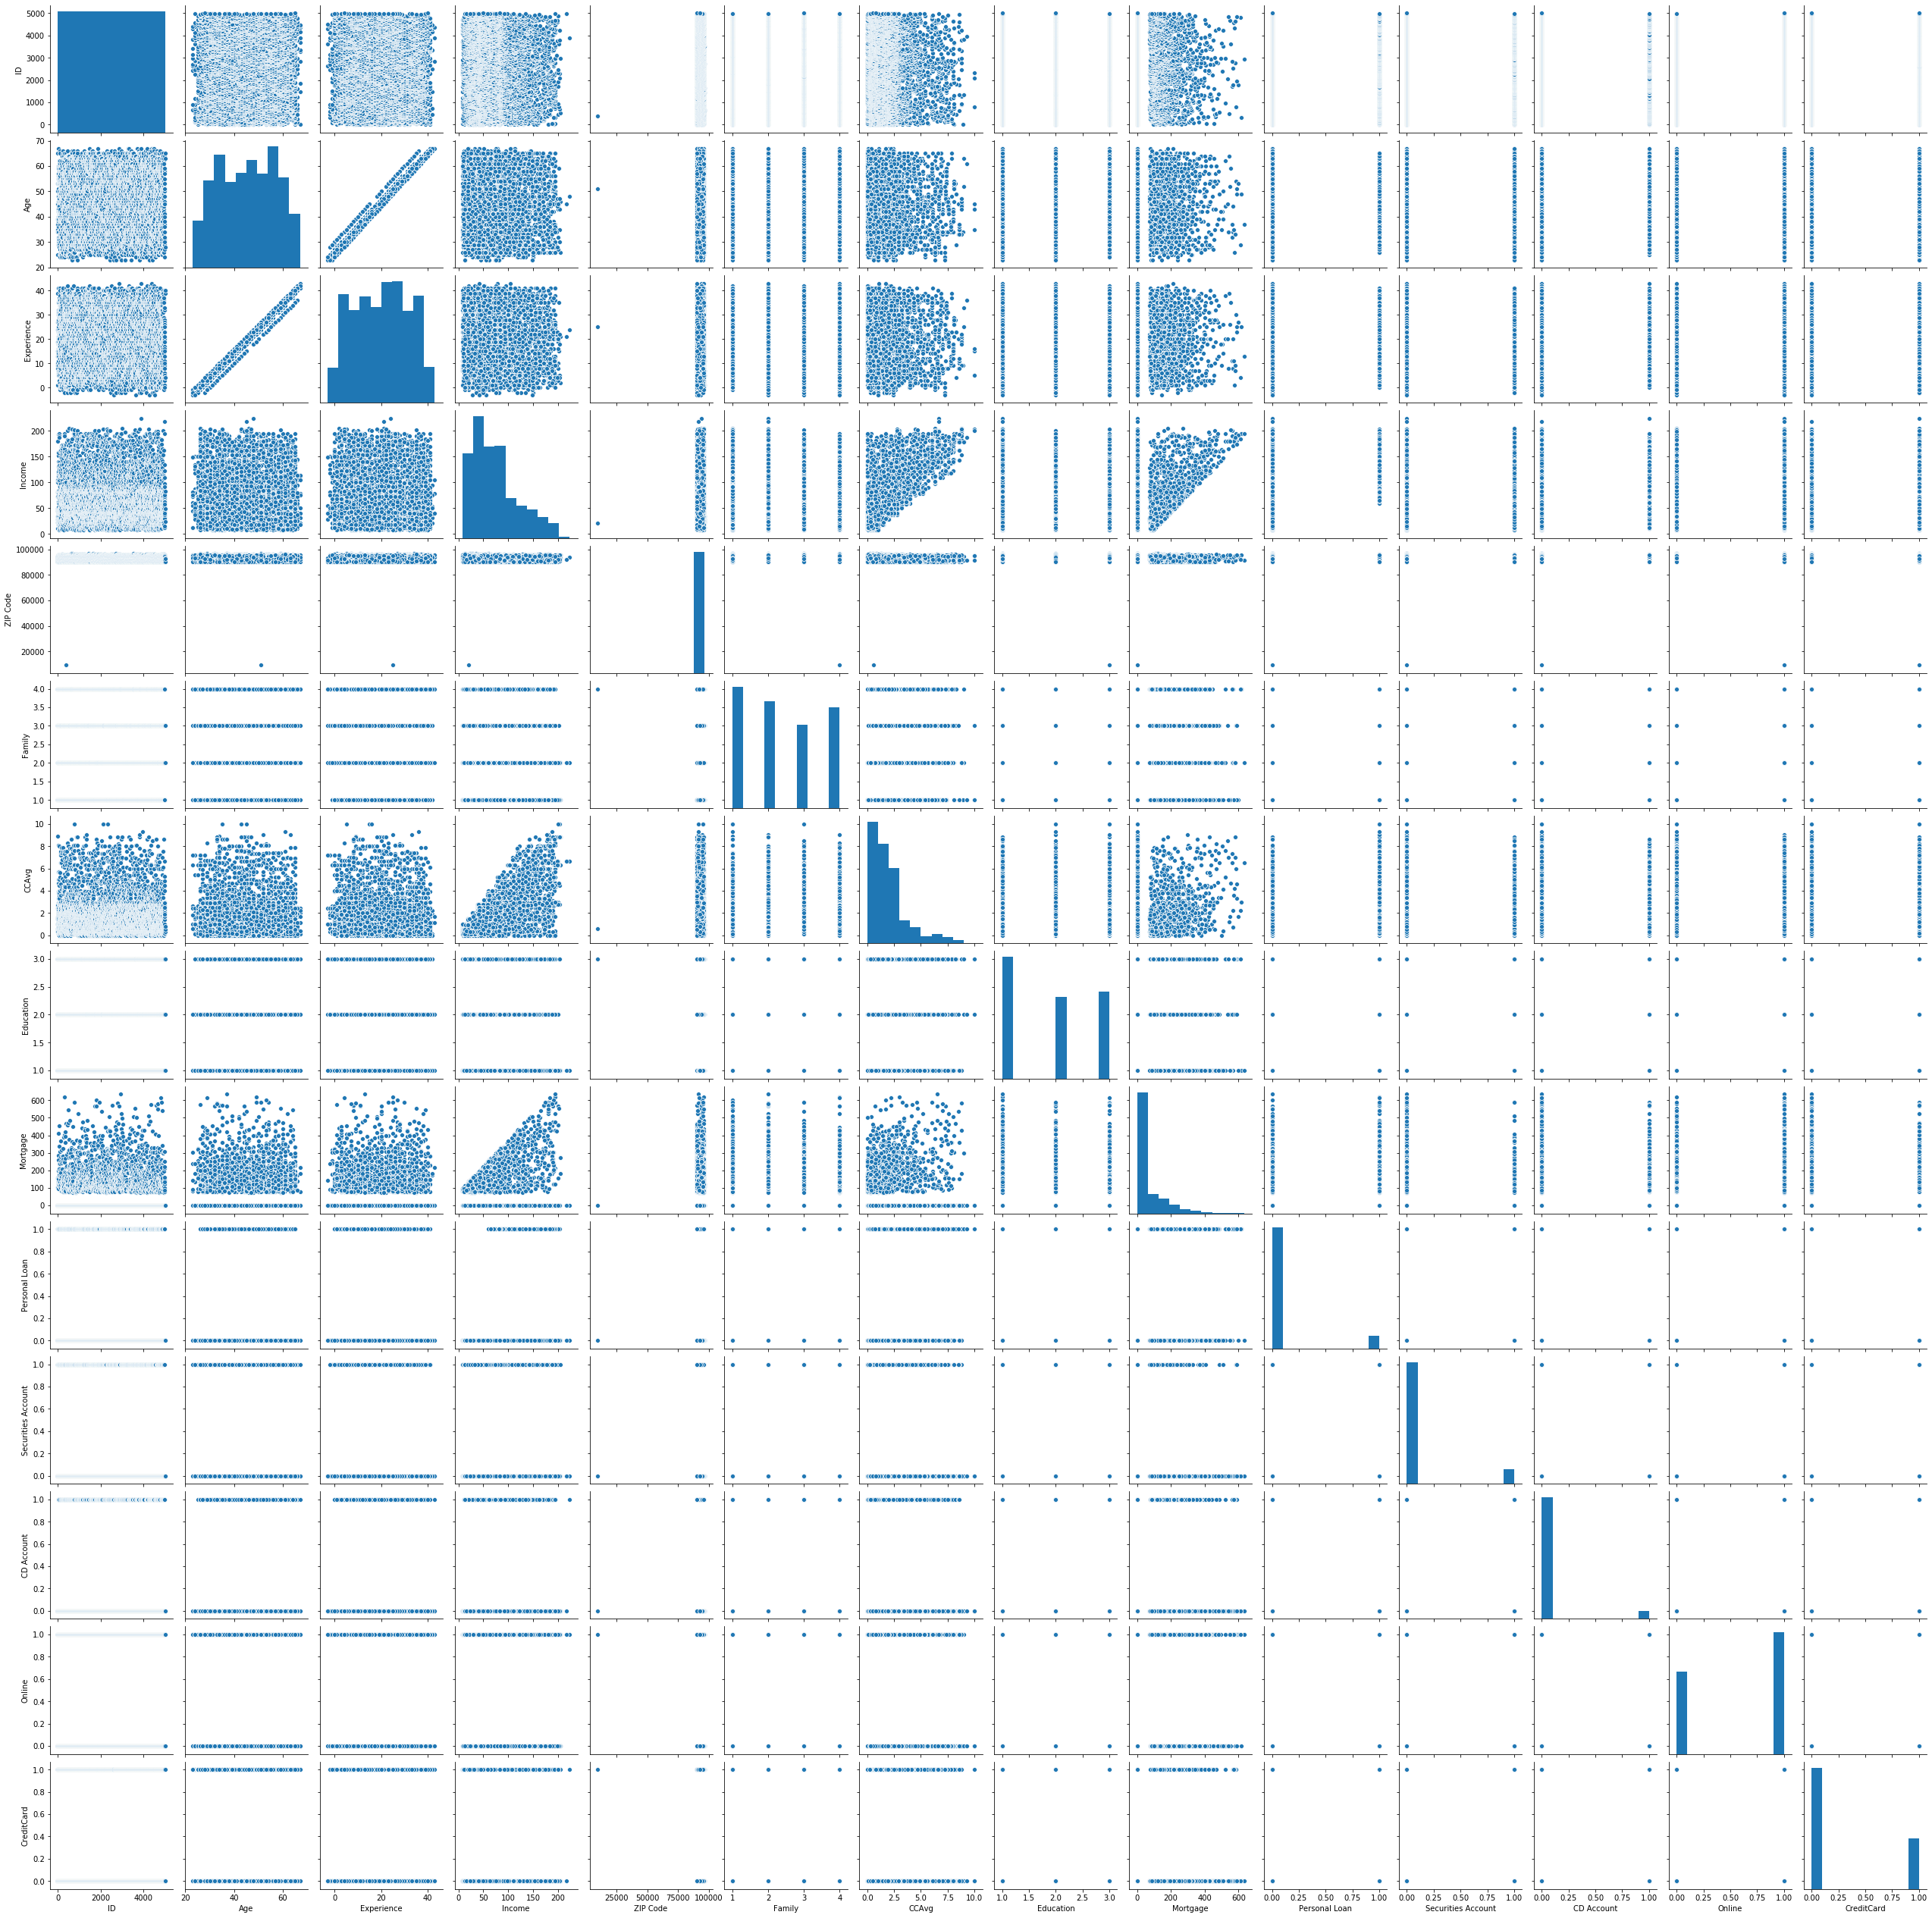

In [17]:
sns.pairplot(df)

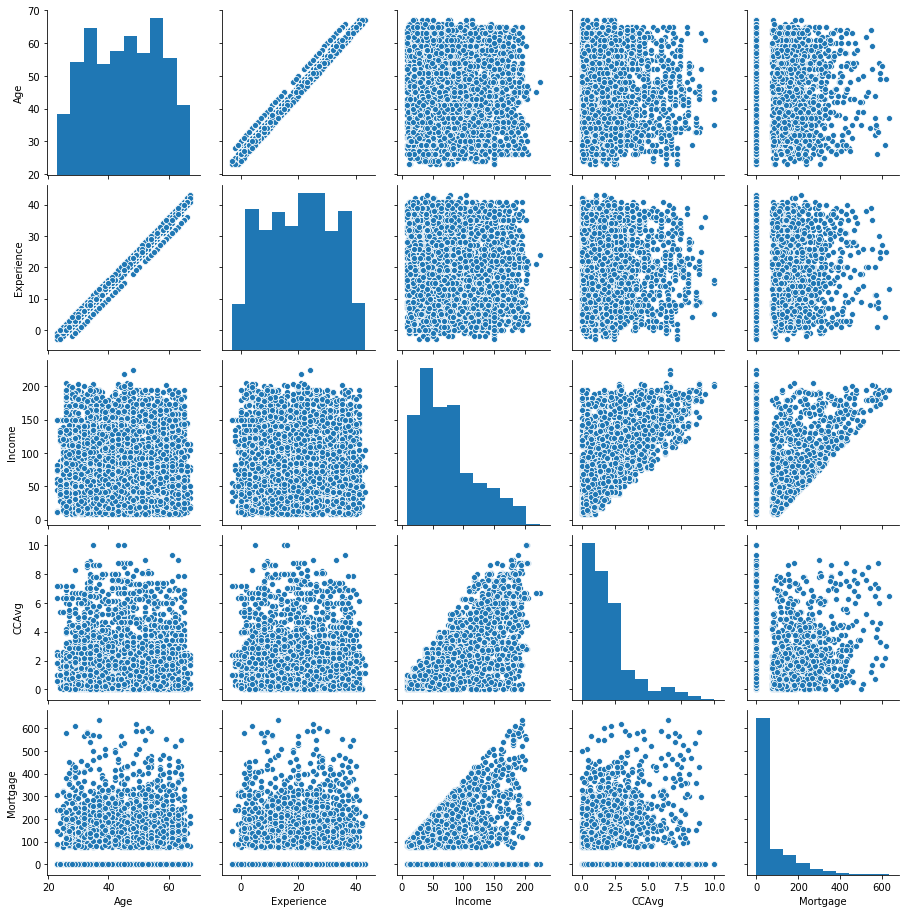

In [18]:
#Pair plot of only the continuous variables
sns.pairplot(df[concols])

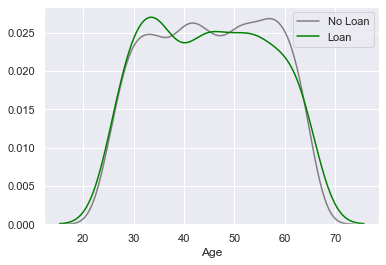

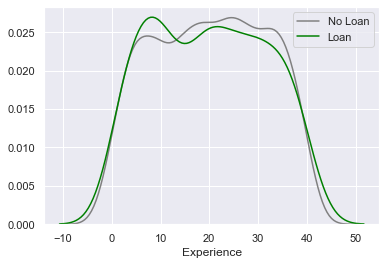

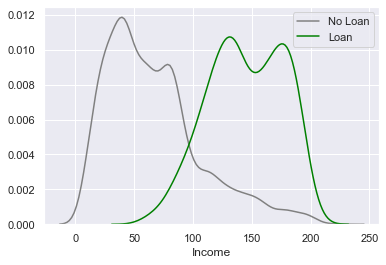

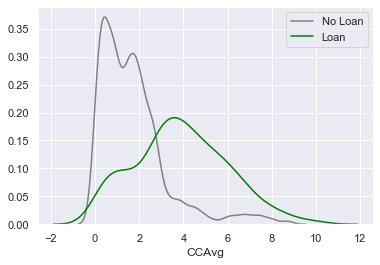

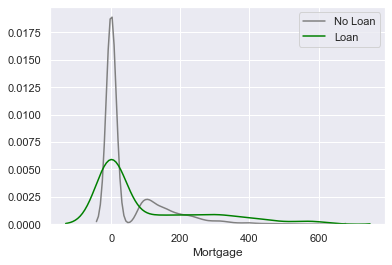

In [19]:
sns.set(font_scale=1) 
for c in concols:
    sns.distplot(df[df['Personal Loan']==0][c], hist=False, color='gray', label='No Loan');
    sns.distplot(df[df['Personal Loan']==1][c], hist=False, color='green', label='Loan');
    plt.legend()
    plt.show()

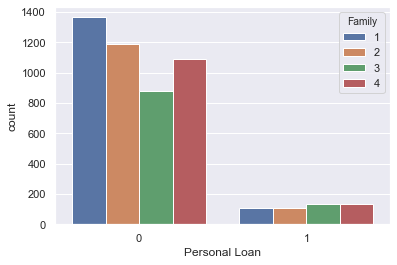

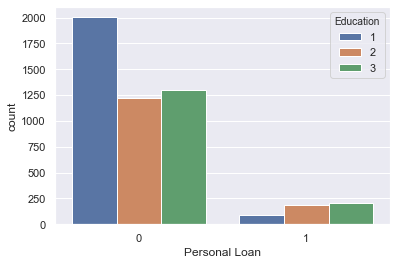

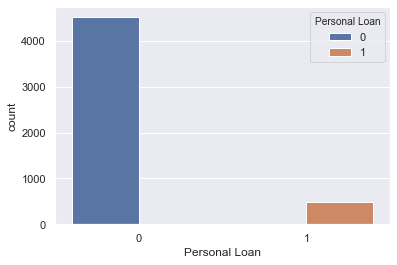

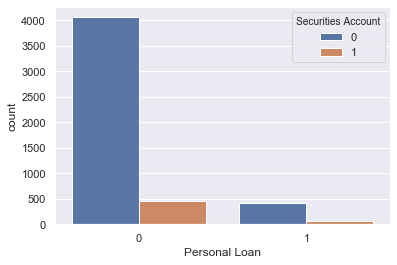

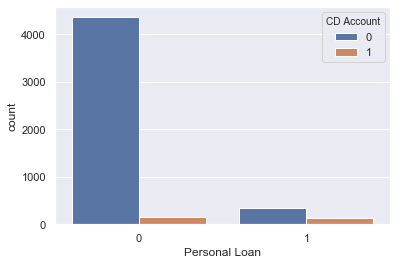

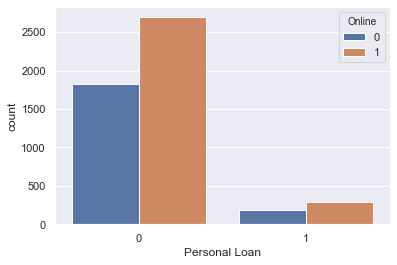

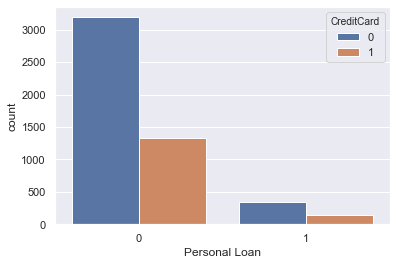

In [20]:
for c in catcols:
    sns.countplot(df['Personal Loan'], hue=df[c]);
    plt.show()

### Observations
* Age and Experience are highly correlated.
* Mortgage-vs-Income and CCAvg-vs-Income have the upper triangle data missing. This indicates people with lower income are less likely to take Mortgage and/or have lower monthly Credit Card expenses. 
* Relationship of 'Perosnal Loan' (our dependent paramter) vs. various other continuous and categorical parameters were analyzed. A strong observation can be made with respect to Income. Lower the income, less likely to take Personal Loan. Similarly, CCAvg seem to have some correlation. However, no such observation can be made with respect to Age, Experience and Mortgage. 

## Get data model ready
* ID and ZIP Codes will be removed as they are nominal variables.
* Experience has negative values. The negative values will be replaced with zeros (0s).

In [21]:
df3 = df.drop(columns=['ID','ZIP Code'])

In [22]:
putzero = lambda x : 0 if x < 0 else x
df3.Experience = df3.Experience.apply(putzero)

In [23]:
df3.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


## 3. Split the data into training and test set in the ratio of 70:30 respectively

* Dependent Variable is 'Personal Loan' as we want to understand who opted for Personal Loan in the previous campaign and focus on those customers

In [24]:
X = df3[['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Securities Account','CD Account','Online','CreditCard']]
y = df3['Personal Loan']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=100)

## 4. Use Logistic Regression model to predict the numberof a customers buying personal loans. Print all the metrics related for evaluating the model performance

### Model-A

In [25]:
lrmodel = LogisticRegression()
lrmodel.fit(X_train, y_train)

C:\Users\Bikram\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
print("Model Coefficients are:")
lrmodel.coef_[0]

Model Coefficients are:


array([-5.09429692e-01,  5.19364633e-01,  5.33088102e-02,  6.11124597e-01,
        9.39401235e-02,  1.76204630e+00,  8.03074915e-04,  4.04383588e-01,
        2.35041462e+00, -1.00011067e+00, -4.34802826e-01])

In [27]:
print("Model Intercept Is:")
lrmodel.intercept_[0]

Model Intercept Is:


-0.38599108133662363

In [28]:
print("In-Sample Score \t: {:.5f}".format(lrmodel.score(X_train,y_train)))
print("Out-Sample Score\t: {:.5f}".format(lrmodel.score(X_test,y_test)))

In-Sample Score 	: 0.95229
Out-Sample Score	: 0.93667


The model score is very good. It seemingly indicates very good model.

In [29]:
def LRModelEvaluation(lrmodel, X_test, y_test):
    y_predict = lrmodel.predict(X_test)  
    cm = confusion_matrix(y_test,y_predict,labels=[1,0])
    #Plot Heatmap
    
    df_cm = pd.DataFrame(cm, index = ["True 1","True 0"],
                  columns = ["Predict 1","Predict 0"])
 
    #Scores
    tp, fn, fp, tn = cm.ravel()
    total = tp + tn + fp + fn
    recall = tp/(tp+fn)
    recall_m = recall_score(y_test, y_predict)
    precision = tp/(tp+fp)
    precision_m = precision_score(y_test, y_predict)
    
    specificity = tn/(tn+fn)
    accuracy = (tp+tn)/total
    accuracy_m = accuracy_score(y_test, y_predict)
    
    errorrate = 1 - accuracy
    f1score = 2 * precision * recall / (precision+recall)
    f1score_m = f1_score(y_test, y_predict)
    roc_auc = roc_auc_score(y_test,y_predict)
    print()
    print("====Evaluation Scores====")
    print("Total Sample Size\t: {} ".format(total))
    print("True Positive\t\t: {}".format(tp))
    print("False Negative\t\t: {}".format(fn))
    print("True Negative\t\t: {}".format(tn))
    print("False Positive\t\t: {}".format(fp))

    print("Recall Score \t\t: my calc={c:.3f},\t sklearn.metrics={m:.3f}".format(c=recall, m=recall_m))
    print("Precision Score \t: my calc={c:.3f},\t sklearn.metrics={m:.3f}".format(c=precision, m=precision_m))

    print("Specificity\t\t: my calc={c:.3f},\t sklearn.metrics={m:}".format(c=specificity, m='?'))
    print("F1 Score\t\t: my calc={c:.3f},\t sklearn.metrics={m:.3f}".format(c=f1score, m= f1score_m))
    print("Accuracy\t\t: my calc={c:.3f},\t sklearn.metrics={m:.3f}".format(c=accuracy, m=accuracy_m))
    print("Error Rate\t\t: my calc={c:.3f},\t sklearn.metrics={m:.3f}".format(c=errorrate, m = 1-accuracy_m))
    print("Roc Auc Score\t\t: my calc={c:},\t\t sklearn.metrics={m:.3f}".format(c='N/A', m=roc_auc))
    
    #ROC Data
    fpr, tpr, thresholds = roc_curve(y_test, lrmodel.predict_proba(X_test)[:,1])
   
    #Plotting
    plt.figure(figsize = (18,7))
    plt.subplot(1,2,1)
    sns.set(font_scale=1.8)
    sns.heatmap(df_cm,annot=True,fmt='0000',cmap='plasma');
    plt.title('Confusion Matrix')
   
    plt.subplot(1,2,2)
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()  

Original Attempt: Model-A

====Evaluation Scores====
Total Sample Size	: 1500 
True Positive		: 87
False Negative		: 71
True Negative		: 1318
False Positive		: 24
Recall Score 		: my calc=0.551,	 sklearn.metrics=0.551
Precision Score 	: my calc=0.784,	 sklearn.metrics=0.784
Specificity		: my calc=0.949,	 sklearn.metrics=?
F1 Score		: my calc=0.647,	 sklearn.metrics=0.647
Accuracy		: my calc=0.937,	 sklearn.metrics=0.937
Error Rate		: my calc=0.063,	 sklearn.metrics=0.063
Roc Auc Score		: my calc=N/A,		 sklearn.metrics=0.766


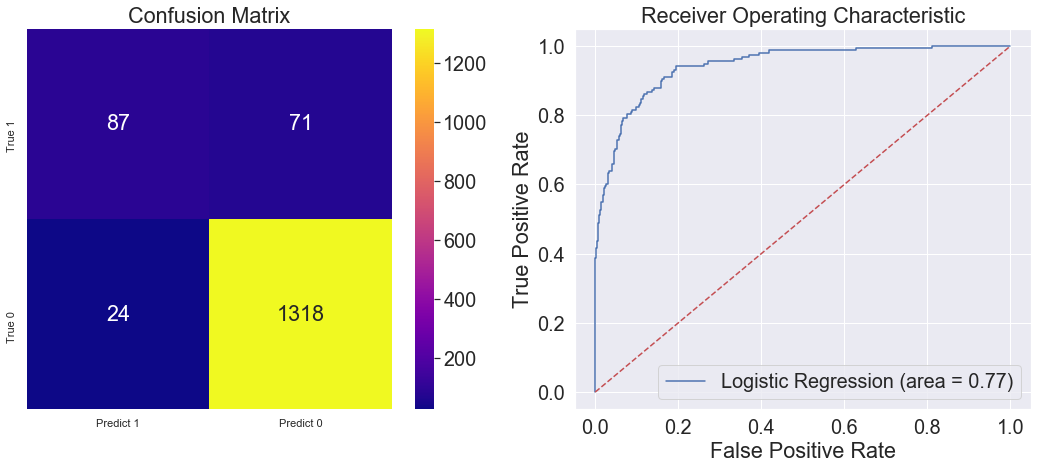

In [30]:
#Main program
print("Original Attempt: Model-A")
LRModelEvaluation(lrmodel, X_test, y_test)

## 5. Give your reasoning on how can the model perform better? Hint: Check parameter

The model has a
<b><u>Recall Score</u></b> of 0.551. <br /> (very poor) and 
<b><u>Precision Score</u></b> of 0.784 (moderate). <br />

It indicates the model is detecting too many False Negative compared to True Positives.

We need to think of ways to improve these parameters.

### Two attampts will be made to improve the model.
In <b>Attempt-1</b>, three new features will be addded.
In <b>Attempt-2</b>, model parameters will be atlered and see if it improves the model performances.
In <b>Attempt-3</b>, we will combine the above two procedure to obtain even better results.

## Attempt-1 : Model-B

In [35]:
#New features Income Indicator , LogMortgage, Income* CCAvg are added. 
# these were selected based on prior analysis that shows some influence on the target variable 'Personal Loan'
minlogmortgage = df2.LogMortgage.min()
incomeidx = lambda x : 1 if x <100 else 2
lognozero = lambda x : np.log(x) if x > 0 else minlogmortgage
df3["IncomeIDX"] = df3.Income.apply(incomeidx)
df3["LogMort"] = df3.Mortgage.apply(lognozero)
df3["IncomeCCAvg"] = df3.Income * df3.CCAvg

df3.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,IncomeIDX,LogMort,IncomeCCAvg
0,25,1,49,4,1.6,1,0,0,1,0,0,0,1,4.317488,78.4
1,45,19,34,3,1.5,1,0,0,1,0,0,0,1,4.317488,51.0
2,39,15,11,1,1.0,1,0,0,0,0,0,0,1,4.317488,11.0
3,35,9,100,1,2.7,2,0,0,0,0,0,0,2,4.317488,270.0
4,35,8,45,4,1.0,2,0,0,0,0,0,1,1,4.317488,45.0


C:\Users\Bikram\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Attempt-1: Model-B

====Evaluation Scores====
Total Sample Size	: 1500 
True Positive		: 98
False Negative		: 60
True Negative		: 1327
False Positive		: 15
Recall Score 		: my calc=0.620,	 sklearn.metrics=0.620
Precision Score 	: my calc=0.867,	 sklearn.metrics=0.867
Specificity		: my calc=0.957,	 sklearn.metrics=?
F1 Score		: my calc=0.723,	 sklearn.metrics=0.723
Accuracy		: my calc=0.950,	 sklearn.metrics=0.950
Error Rate		: my calc=0.050,	 sklearn.metrics=0.050
Roc Auc Score		: my calc=N/A,		 sklearn.metrics=0.805


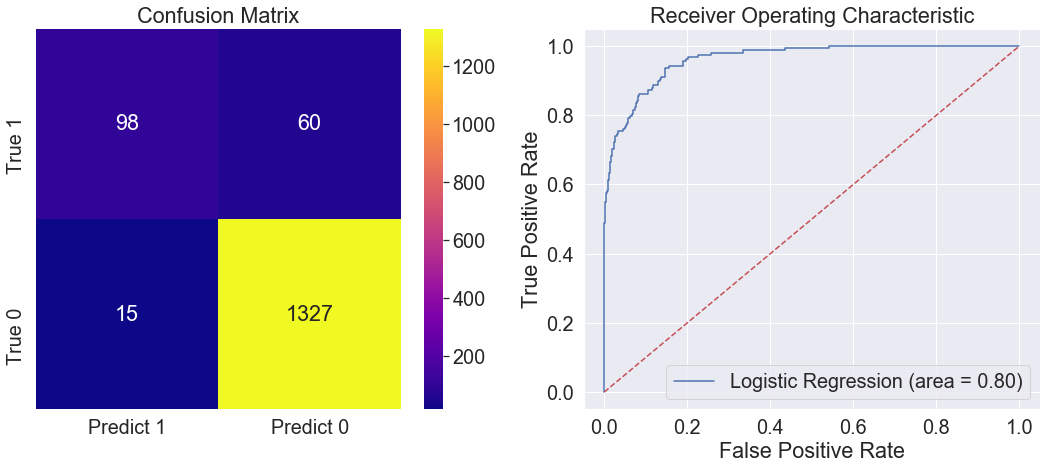

In [32]:
XB = df3[['Age','Experience','Income','Family','CCAvg','Education','Mortgage', \
          'Securities Account','CD Account','Online','CreditCard','LogMort','IncomeIDX','IncomeCCAvg']]
yB = df3['Personal Loan']

XB_train, XB_test, yB_train, yB_test = train_test_split(XB,yB,test_size=0.30, random_state=100)

lrmodelB = LogisticRegression()
lrmodelB.fit(XB_train, yB_train)
print("Attempt-1: Model-B")
LRModelEvaluation(lrmodelB, XB_test, yB_test)

In Attempt-1, some improvement of results can be seen. In ROC_AUC Score increased from 0.766 to 0.805.

## Attempt-2 : Model-C
In this attempt, model parameters like penalty, C and solver will be altered.

C:\Users\Bikram\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Best Penalty: l2
Best C: 2.7825594022071245
Best Solver: lbfgs
Attempt-2: Model-C

====Evaluation Scores====
Total Sample Size	: 1500 
True Positive		: 91
False Negative		: 67
True Negative		: 1319
False Positive		: 23
Recall Score 		: my calc=0.576,	 sklearn.metrics=0.576
Precision Score 	: my calc=0.798,	 sklearn.metrics=0.798
Specificity		: my calc=0.952,	 sklearn.metrics=?
F1 Score		: my calc=0.669,	 sklearn.metrics=0.669
Accuracy		: my calc=0.940,	 sklearn.metrics=0.940
Error Rate		: my calc=0.060,	 sklearn.metrics=0.060
Roc Auc Score		: my calc=N/A,		 sklearn.metrics=0.779


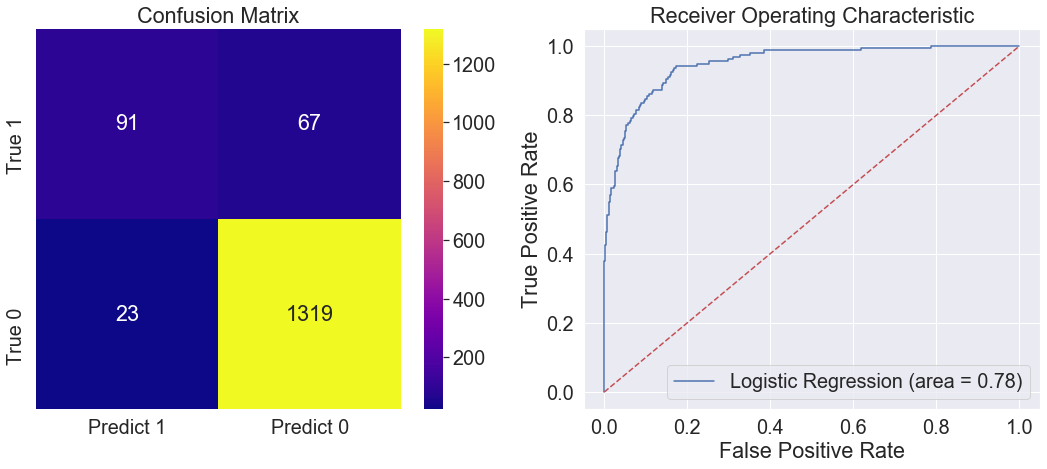

In [33]:
from sklearn.model_selection import GridSearchCV

lrmodelC = LogisticRegression()
penalty = ['l1','l2', 'elasticnet', 'none']
C=np.logspace(0,4,10)
solver = ['newton-cg','lbfgs','liblinear','sag','saga']

hyperparameters = dict(C=C, penalty=penalty, solver=solver, max_iter=[200])
clf = GridSearchCV(lrmodelC, param_grid=hyperparameters, cv=5, n_jobs=-1)
lrmodelC = clf.fit(X_train, y_train)

print('Best Penalty:', lrmodelC.best_estimator_.get_params()['penalty'])
print("Best C:", lrmodelC.best_estimator_.get_params()['C'])
print("Best Solver:", lrmodelC.best_estimator_.get_params()['solver'])
print("Attempt-2: Model-C")
LRModelEvaluation(lrmodelC, X_test, y_test)

### Attempt-3 : Model-D

Attempt-3: Model-D

====Evaluation Scores====
Total Sample Size	: 1500 
True Positive		: 100
False Negative		: 58
True Negative		: 1325
False Positive		: 17
Recall Score 		: my calc=0.633,	 sklearn.metrics=0.633
Precision Score 	: my calc=0.855,	 sklearn.metrics=0.855
Specificity		: my calc=0.958,	 sklearn.metrics=?
F1 Score		: my calc=0.727,	 sklearn.metrics=0.727
Accuracy		: my calc=0.950,	 sklearn.metrics=0.950
Error Rate		: my calc=0.050,	 sklearn.metrics=0.050
Roc Auc Score		: my calc=N/A,		 sklearn.metrics=0.810


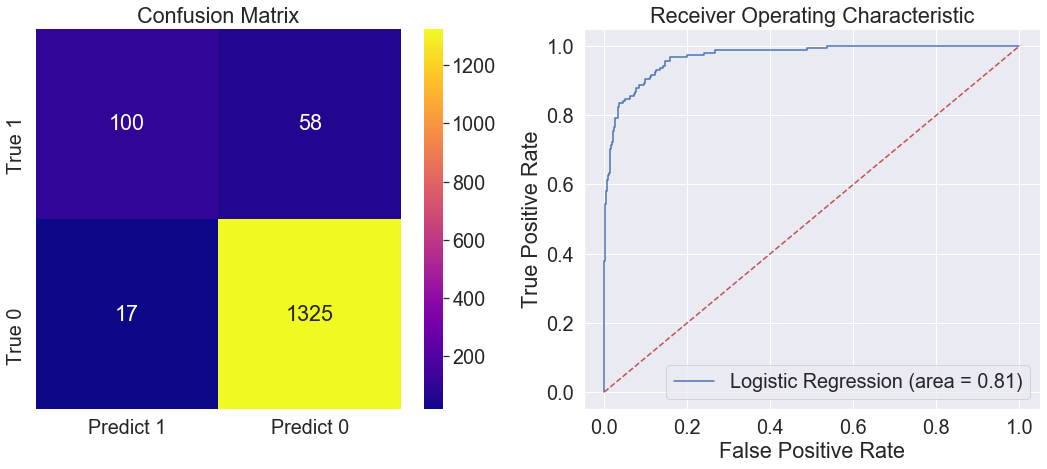

In [34]:
#Mixing the methods of Model B & C

lrmodelD = clf.fit(XB_train, yB_train)
print("Attempt-3: Model-D")
LRModelEvaluation(lrmodelD, XB_test, yB_test)

### Conclusion
<table >
<tr>
    <th>Models</th><th>Recall Score</th><th>Precision_Score</th><th>ROC_AUC Score</th>
</tr>
<tr>
    <td>Model-A</td><td>0.551</td><td>0.784</td><td>0.766</td>
</tr>
<tr>
    <td>Model-B</td><td>0.620</td><td>0.876</td><td>0.805</td>
</tr>
<tr>
    <td>Model-C</td><td>0.576</td><td>0.798</td><td>0.779</td>
</tr>
<tr>
    <td>Model-D</td><td>0.663</td><td>0.855</td><td>0.810</td>
</tr>

</table>

As we can see from the above table, there is a significant improvements in all the scores from Model-A ro Model-D.  We will use <br /><font color='red' ><b>Model-D</b></font> as it has the best ROC-AUC Score.

## 6. Give Business understanding of your model? (5 marks)

From the problem description, the following two points need to be recalled here:
<br />
1. Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign. 
<br />
2. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget. 

Our selected Model-D, correctly identified 100 customers out of 1500 test samples who accepted the loan offer. This is (100/1500=) 6.67%. This is smaller than the previous value of 9.6%. Using this model, the marketing team can narrow down prospective customers and carry out focused marketing. It will help meet the budget, at the same time increase the better result of the planned marketing campaign of the new Loan Offer.